                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641
                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical 

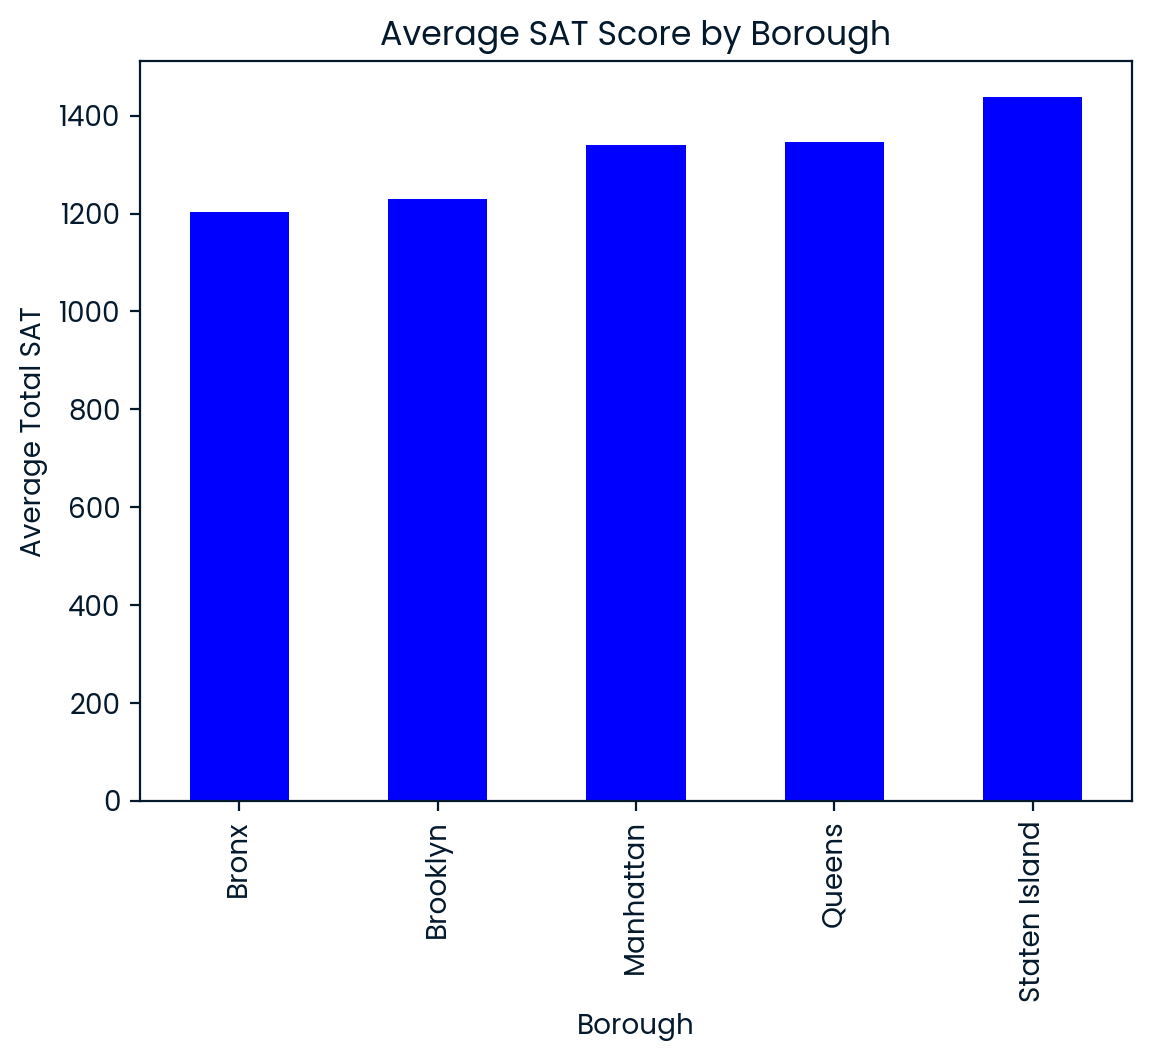

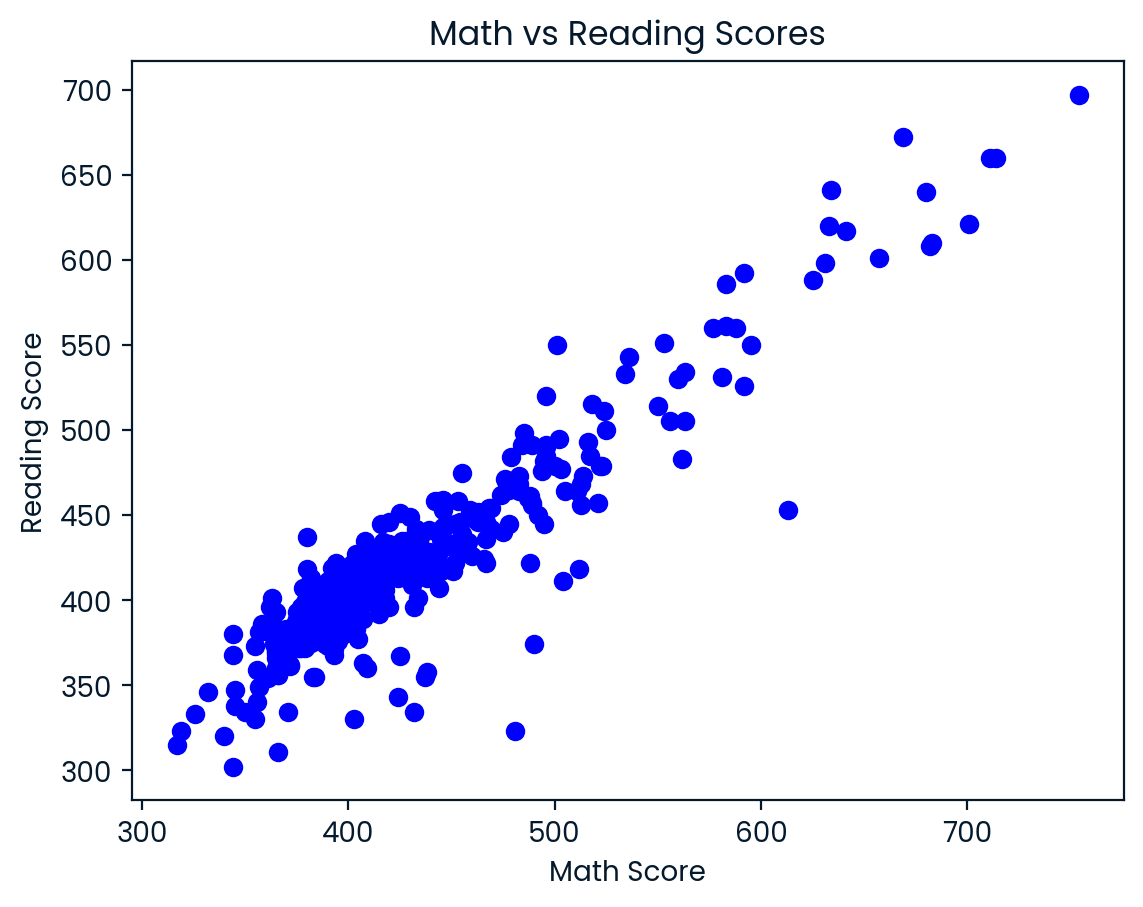

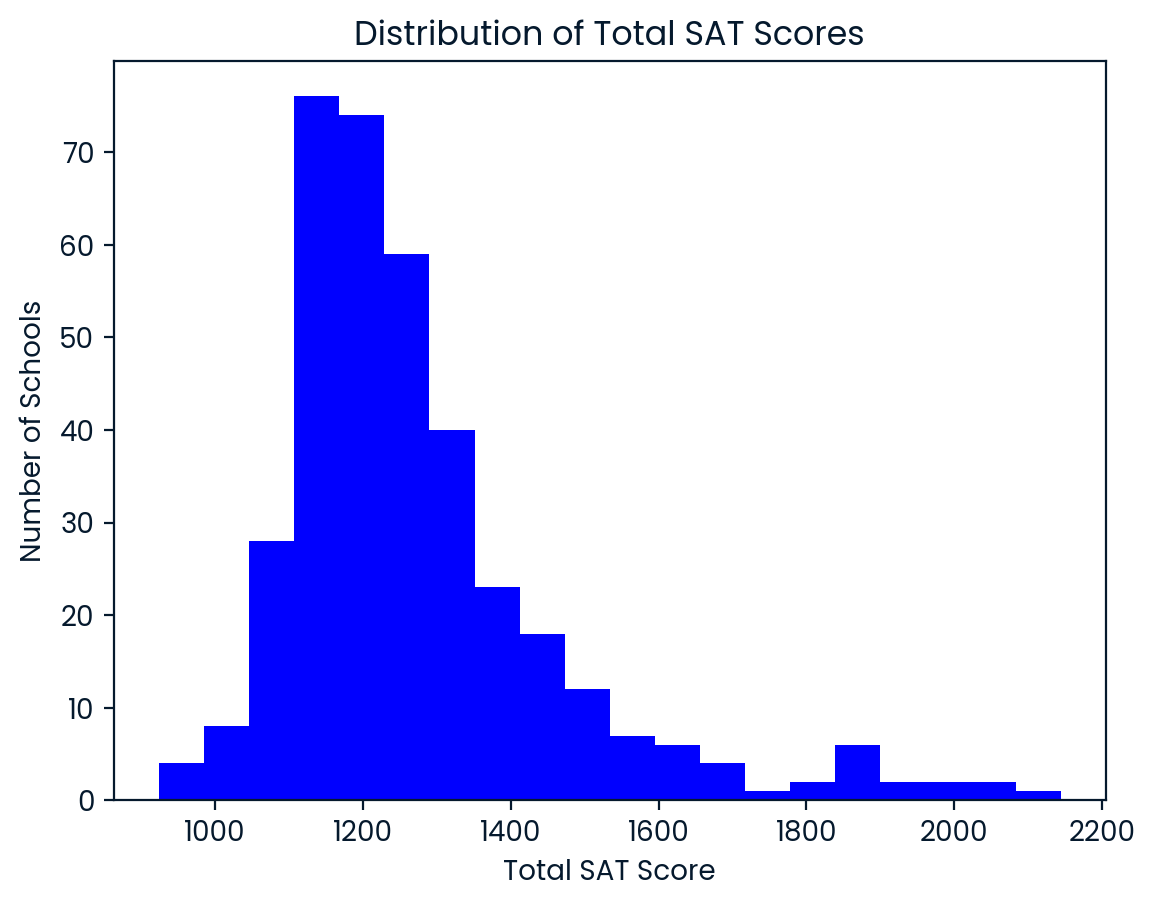

In [3]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

threshold = 0.8 * 800
filtered_schools = schools[schools["average_math"] >= threshold]
sorted_filtered_schools = filtered_schools.sort_values("average_math", ascending = False)
best_math_schools = sorted_filtered_schools[["school_name", "average_math"]]
print(best_math_schools)
schools["total_SAT"] = schools[["average_math", "average_reading", "average_writing"]].sum(axis = 1)
sorted_schools_SAT = schools.sort_values("total_SAT", ascending = False)

top_10_schools = sorted_schools_SAT[["school_name", "total_SAT"]].head(10)

print(top_10_schools)
largest = schools.groupby("borough")["total_SAT"].std()
print(largest.sort_values())
largest_std_borough = largest.idxmax()
print(largest_std_borough)
#Manhattan is the NYC borough with the largest std deviation of "total_SAT"
for_num_schools = schools[schools["borough"] == largest_std_borough]
number_schools = len(for_num_schools)
average__SAT = round(for_num_schools["total_SAT"].mean(), 2)
std__SAT = round(for_num_schools["total_SAT"].std(), 2)
list_of_dicts = [
    {"borough" : largest_std_borough, "num_schools" : number_schools, "average_SAT" : average__SAT, "std_SAT" : std__SAT}
]
largest_std_dev = pd.DataFrame(list_of_dicts)
print(largest_std_dev)

# Average SAT Score by Borough
borough_avg = schools.groupby("borough")["total_SAT"].mean()
borough_avg.plot(kind="bar", color="blue")
plt.title("Average SAT Score by Borough")
plt.xlabel("Borough")
plt.ylabel("Average Total SAT")
plt.xticks(rotation=90)
plt.show()

# Math vs Reading Scores
plt.scatter(schools["average_math"], schools["average_reading"], color="blue")
plt.title("Math vs Reading Scores")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.show()

# Distribution of Total SAT Scores
plt.hist(schools["total_SAT"], bins=20, color="blue")
plt.title("Distribution of Total SAT Scores")
plt.xlabel("Total SAT Score")
plt.ylabel("Number of Schools")
plt.show()


#Instructions:
#Which schools have the highest average math scores?
#Which schools have the highest total SAT scores?
#Which borough has the largest standard deviation in total SAT scores, and what are the statistics for that borough?



